In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mp

In [34]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bigcontest/data.csv")

In [39]:
data[data["P_NAME"] == '오징어'].head(30)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
46,2015.12.28,수산물,대만,대만,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",1.99
94,2015.12.28,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",0.79
119,2015.12.28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",1.23
143,2015.12.28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체,자숙",5.48
160,2015.12.28,수산물,칠레,칠레,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",0.97
166,2015.12.28,수산물,칠레,칠레,판매용,연체류 해물모듬,오징어,오징어,"냉동,지느러미",0.76
169,2015.12.28,수산물,칠레,칠레,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",0.96
204,2016.1.4,수산물,칠레,칠레,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",0.95
236,2016.1.4,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,지느러미",0.60
300,2016.1.4,수산물,페루,페루,자사제품제조용,연체류 해물모듬,오징어,오징어,"냉동,동체,자숙",3.72


In [6]:
data.REG_DATE = pd.to_datetime(data.REG_DATE)

In [7]:
squid_df = data[data["P_NAME"] == '오징어']
squid_df_price = squid_df[["REG_DATE", "P_PRICE"]]
squid_df_price["P_PRICE"] = squid_df_price["P_PRICE"].astype(float)
squid_df_price_date = squid_df_price.groupby("REG_DATE").mean()
squid_df_price_month = squid_df_price_date.resample("M").mean()
squid_df_price_year = squid_df_price_date.resample("Y").mean()

salmon_df = data[data["P_NAME"] == '연어']
salmon_df_price = salmon_df[["REG_DATE", "P_PRICE"]]
salmon_df_price["P_PRICE"] = salmon_df_price["P_PRICE"].astype(float)
salmon_df_price_date = salmon_df_price.groupby("REG_DATE").mean()
salmon_df_price_month = salmon_df_price_date.resample("M").mean()
salmon_df_price_year = salmon_df_price_date.resample("Y").mean()

shrimp_df = data[data["P_NAME"] == '흰다리새우']
shrimp_df_price = shrimp_df[["REG_DATE", "P_PRICE"]]
shrimp_df_price["P_PRICE"] = shrimp_df_price["P_PRICE"].astype(float)
shrimp_df_price_date = shrimp_df_price.groupby("REG_DATE").mean()
shrimp_df_price_month = shrimp_df_price_date.resample("M").mean()
shrimp_df_price_year = shrimp_df_price_date.resample("Y").mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

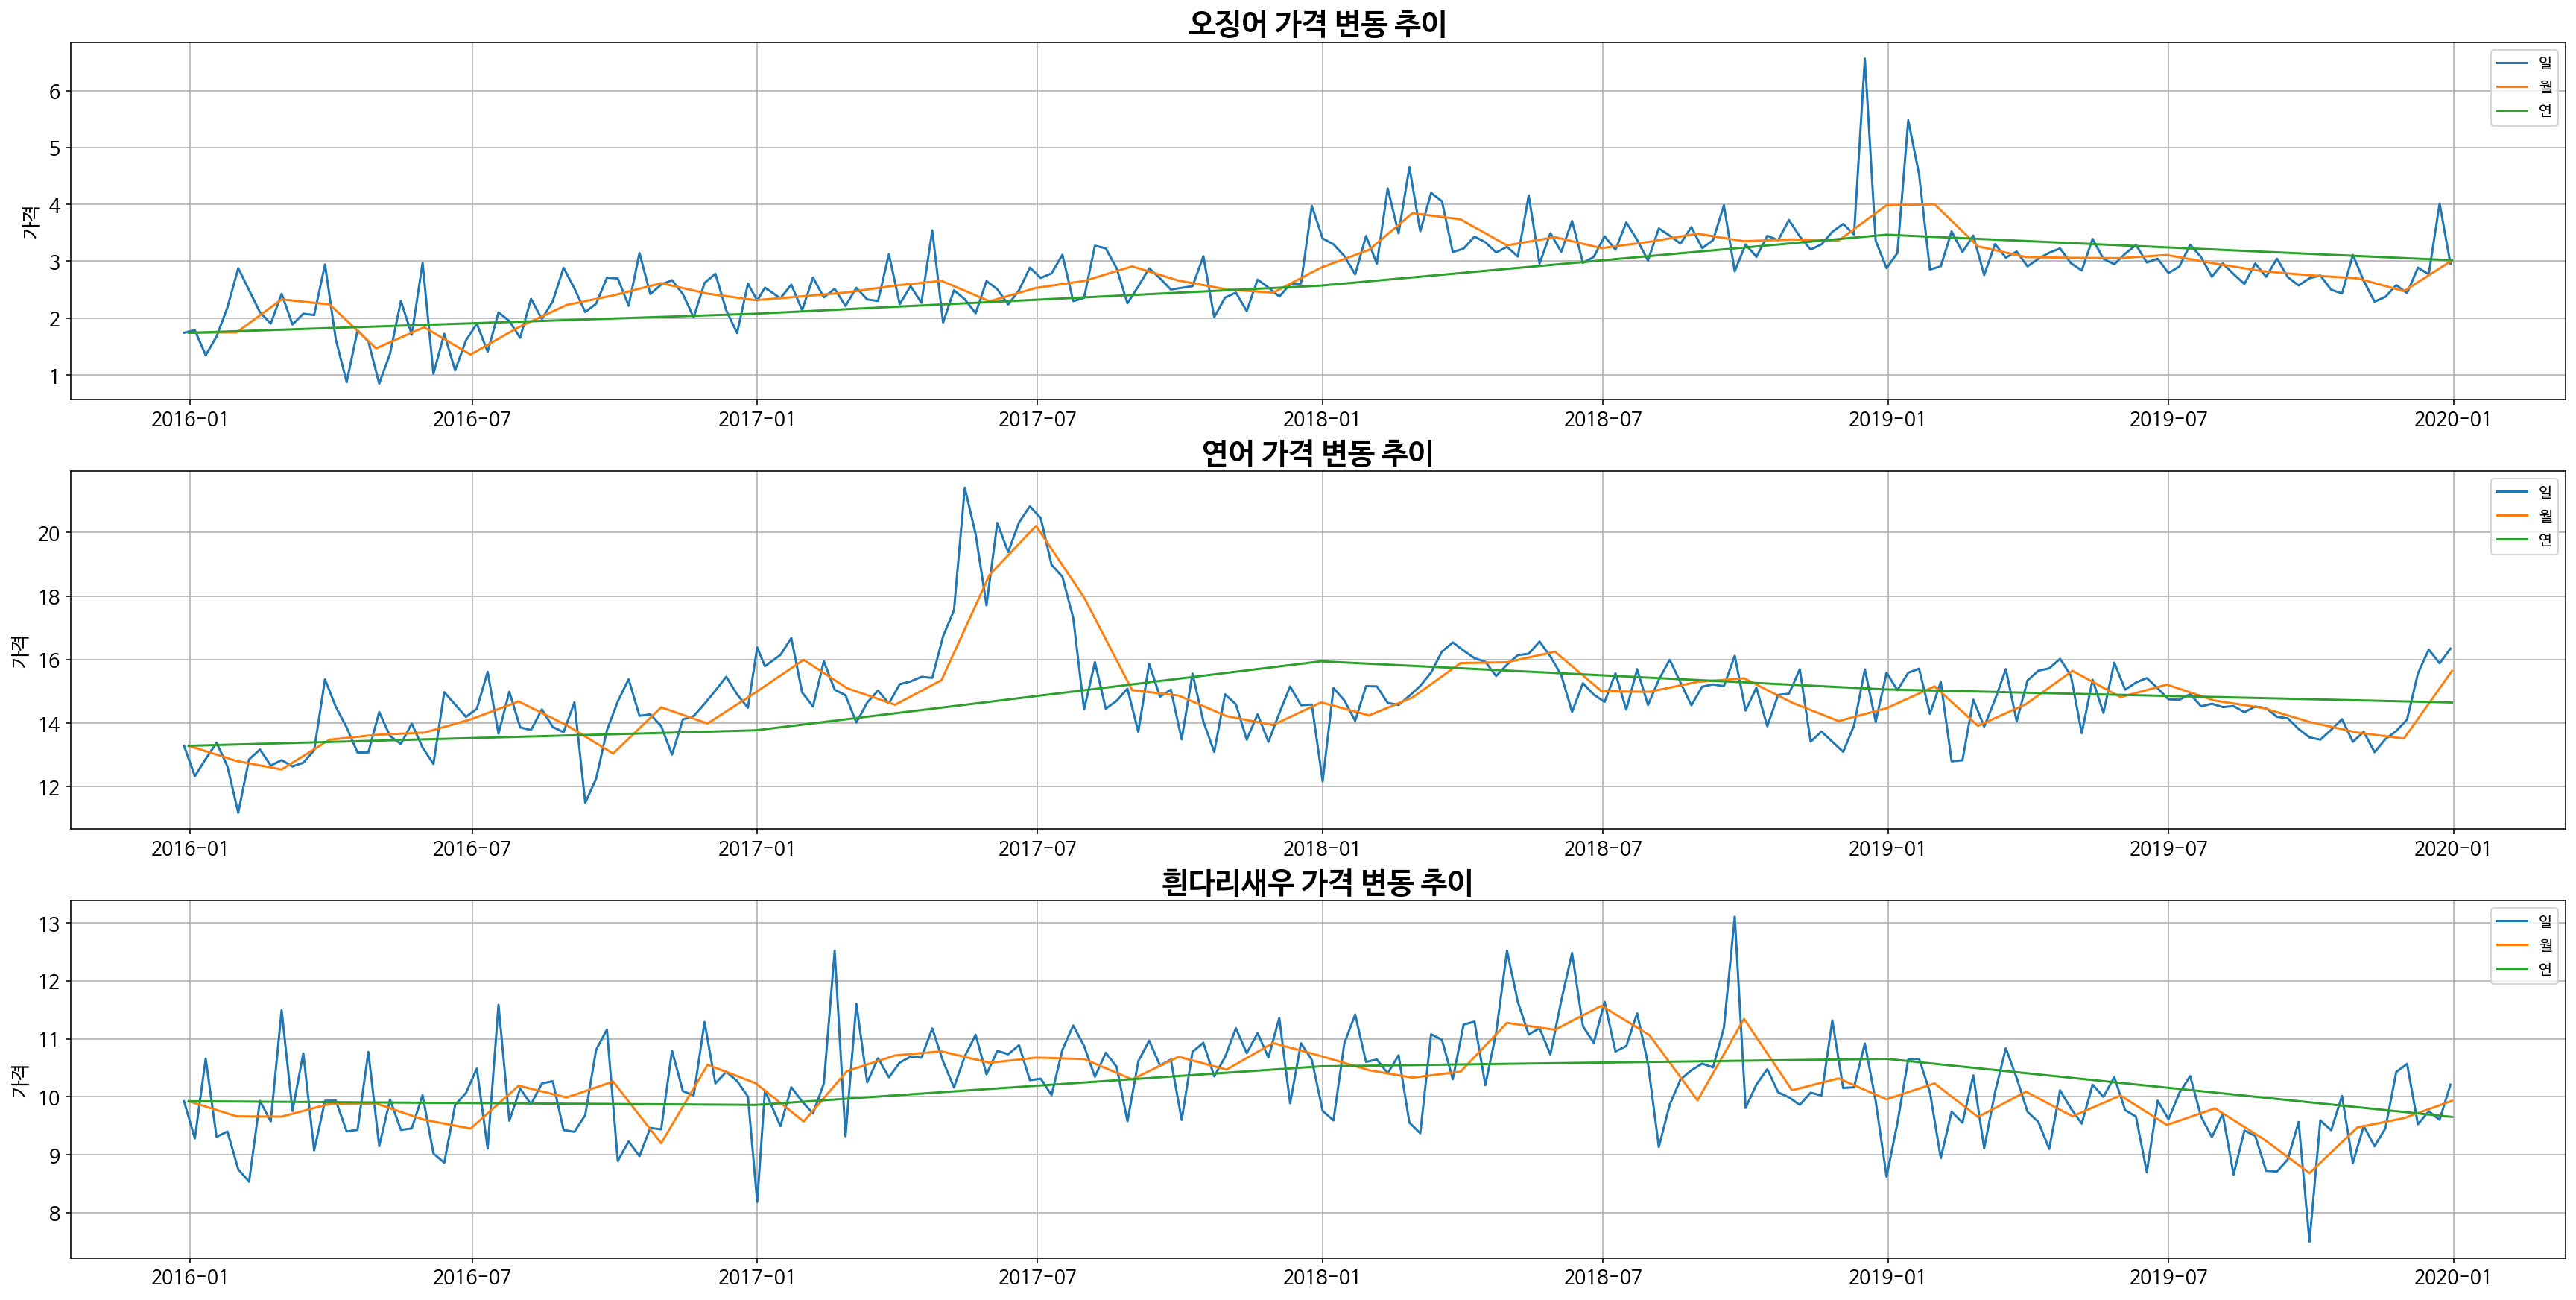

In [56]:
fig, ax = plt.subplots(3 ,figsize=(30,15))
prod_list = ["오징어", "연어", "흰다리새우"]
prod_data_list_date = [squid_df_price_date, salmon_df_price_date, shrimp_df_price_date]
prod_data_list_month = [squid_df_price_month, salmon_df_price_month, shrimp_df_price_month]
prod_data_list_year = [squid_df_price_year, salmon_df_price_year, shrimp_df_price_year]

for i in range(len(ax)):
  ax[i].set_title(f'{prod_list[i]} 가격 변동 추이', fontweight='bold', size=20)
  ax[i].set_ylabel('가격', fontsize=13)
  ax[i].tick_params(axis='y', labelsize=13)
  ax[i].tick_params(axis='x', labelsize=13)
  ax[i].plot(prod_data_list_date[i])
  ax[i].plot(prod_data_list_month[i])
  ax[i].plot(prod_data_list_year[i])
  ax[i].legend(['일', '월', '연'])
  ax[i].grid(True)

fig.savefig("/content/drive/MyDrive/Colab Notebooks/bigcontest/오징어연어새우_가격변동추이.png", dpi=300)

In [53]:
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, .5, .5),
                  (1.0, 0, 0)],
        "blue": [(0, .5, .5),
                 (1.0, 0, 0)]
    }
)

In [61]:
def get_bar_label(bars, row_n:int, col_n:int, fontsize):
  for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width()/2
    ax[row_n][col_n].text(label_x_pos, height, s=f'{height}', ha='center', va='bottom', fontsize=fontsize)

In [11]:
squid_df_prod = squid_df[["REG_DATE", "CTRY_1"]].groupby("CTRY_1").count()
squid_df_prod.columns = ["COUNT"]
squid_df_prod = squid_df_prod.sort_values(by=["COUNT"], ascending=False)

squid_df_import = squid_df[["REG_DATE", "CTRY_2"]].groupby("CTRY_2").count()
squid_df_import.columns = ["COUNT"]
squid_df_import = squid_df_import.sort_values(by=["COUNT"], ascending=False)

squid_df_type1 = squid_df[["REG_DATE", "P_IMPORT_TYPE"]].groupby("P_IMPORT_TYPE").count()
squid_df_type1.columns = ["COUNT"]
squid_df_type1 = squid_df_type1.sort_values(by=["COUNT"], ascending=False)

squid_df_type2 = pd.DataFrame()
squid_df_type2[["1", "2", "3"]] = squid_df['P_IMPORT_TYPE'].str.split(',', expand=True)
squid_df_type2 = pd.concat([squid_df_type2["1"], squid_df_type2["2"], squid_df_type2["3"]], axis=0)
squid_df_type2 = pd.DataFrame(squid_df_type2.dropna(), columns=["TYPE"])
squid_df_type2["COUNT"] = 0
squid_df_type2 = squid_df_type2.groupby("TYPE").count().sort_values(by=["COUNT"], ascending=False)

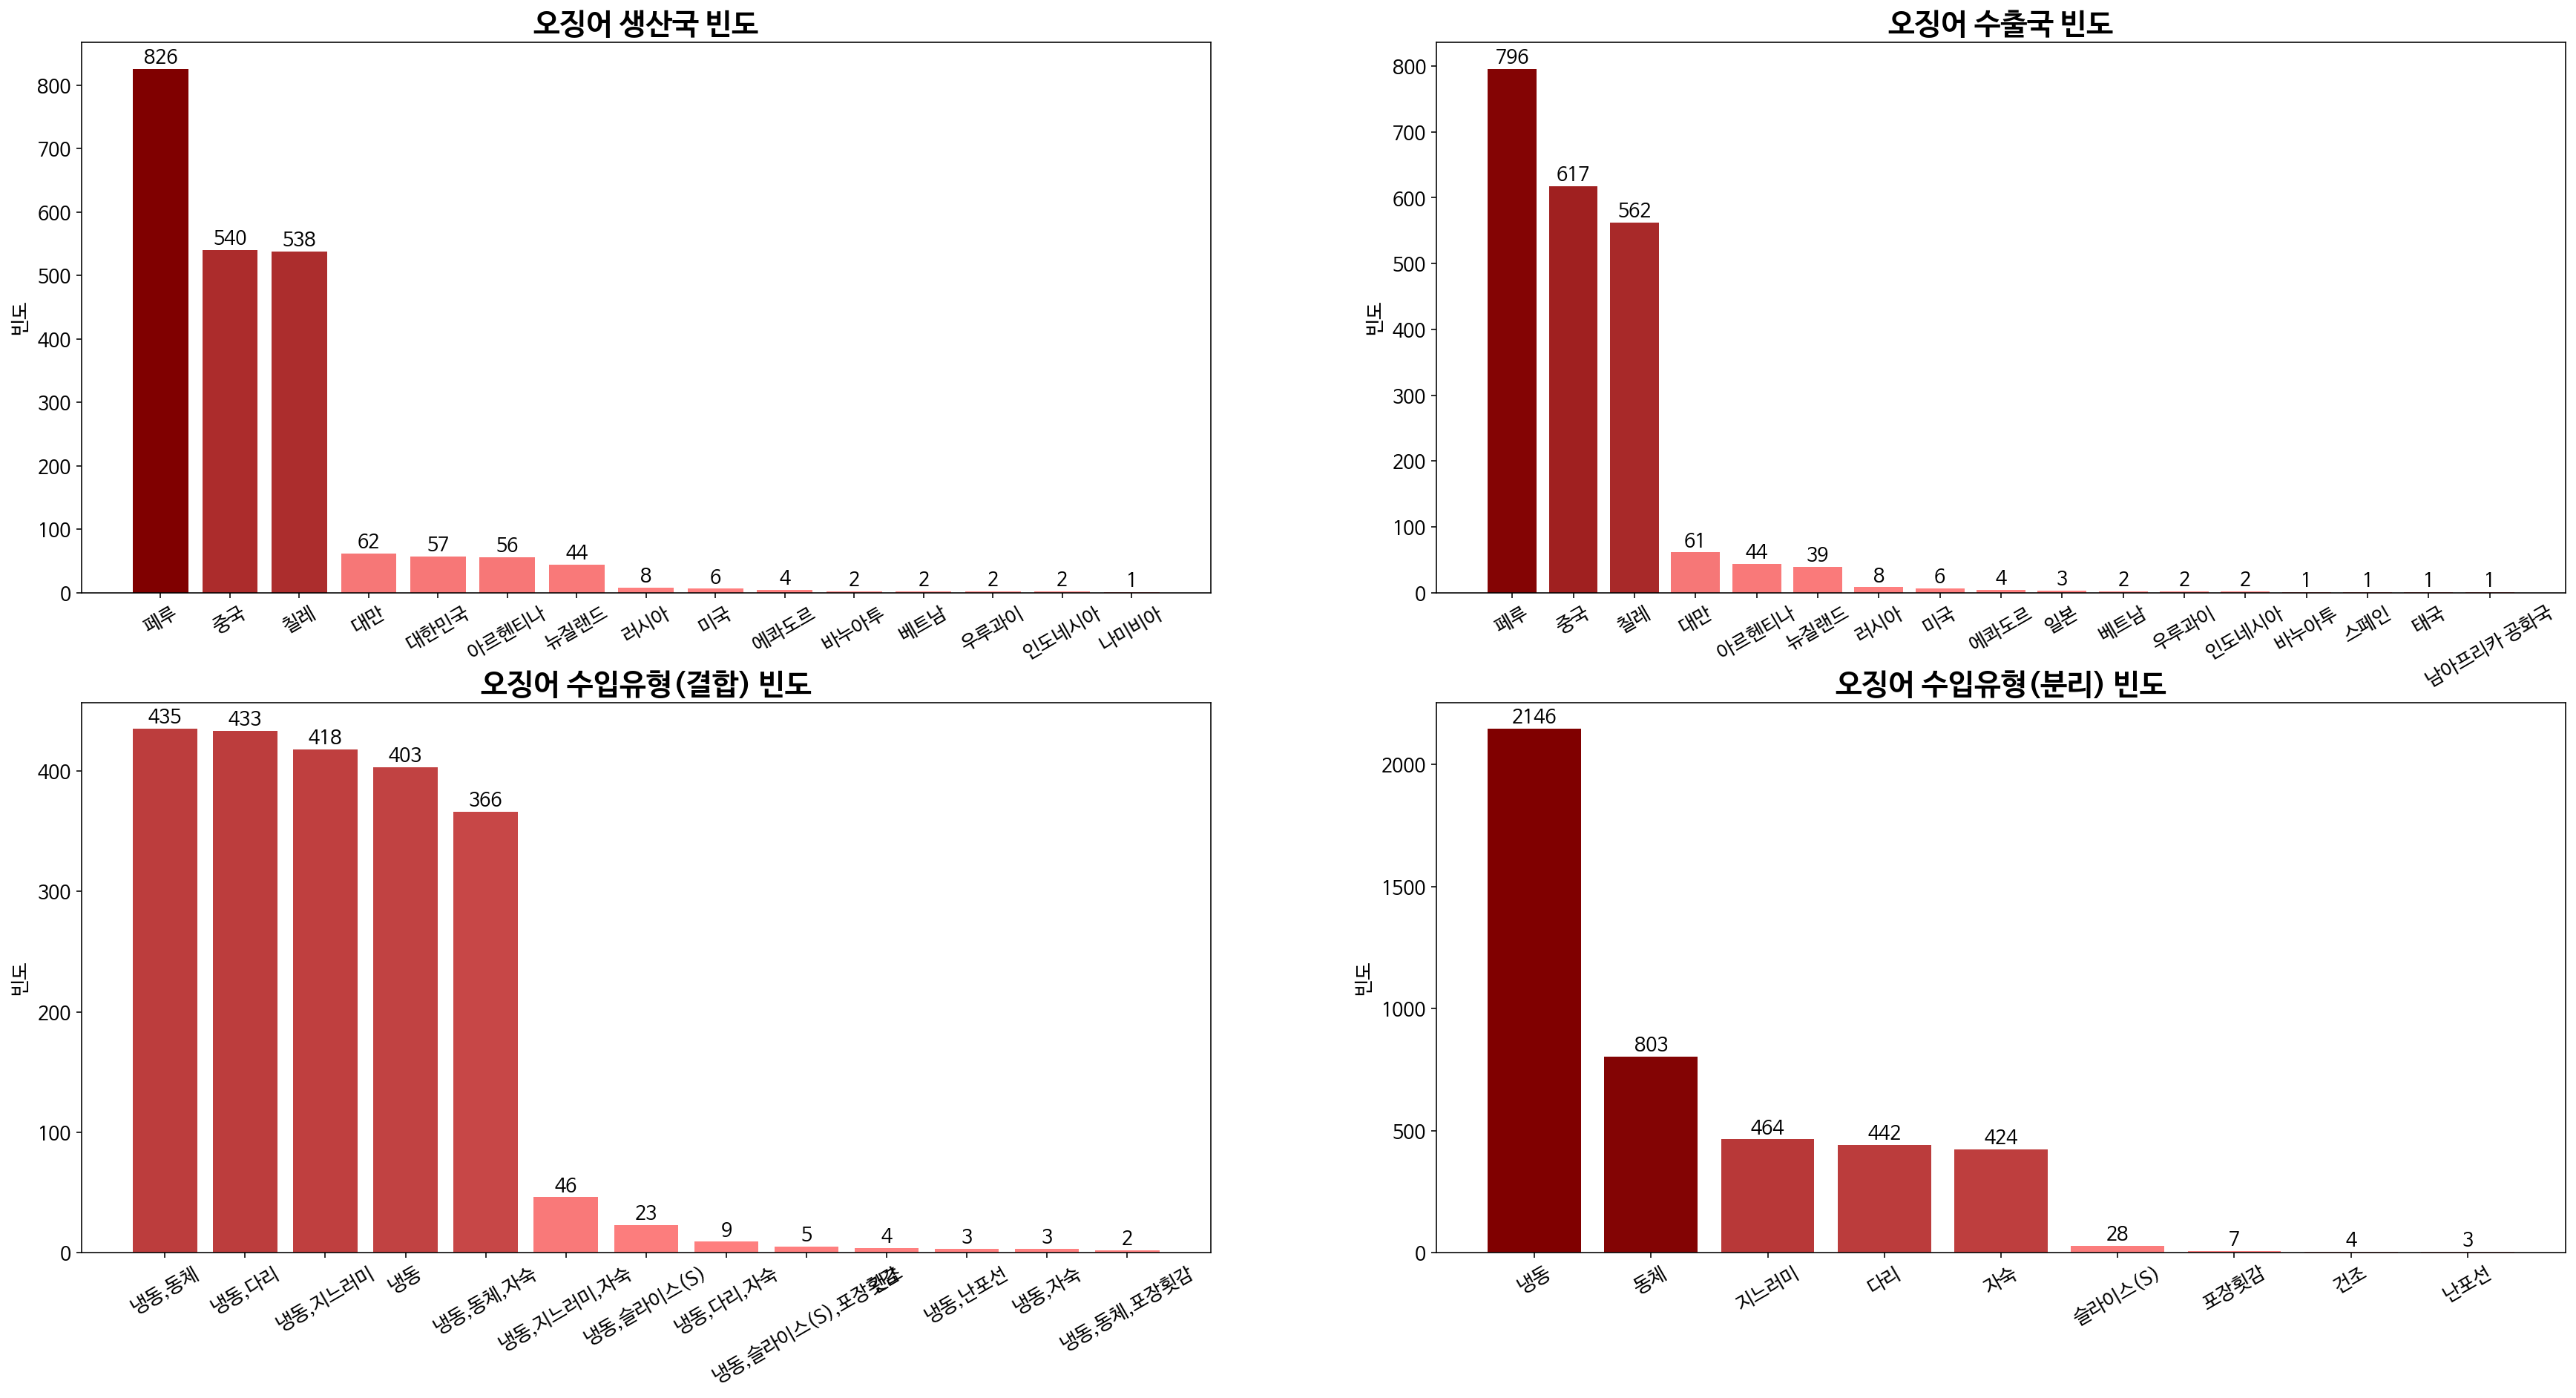

In [63]:
fig, ax = plt.subplots(2, 2 ,figsize=(30,15))
title_list = ['오징어 생산국 빈도', '오징어 수출국 빈도', '오징어 수입유형(결합) 빈도', '오징어 수입유형(분리) 빈도']
squid_data_list = [squid_df_prod, squid_df_import, squid_df_type1, squid_df_type2]
n = 0
for i in range(len(ax)):
  for j in range(len(ax[i])):
    ax[i][j].tick_params(axis='x', labelrotation=30, labelsize=13)
    ax[i][j].tick_params(axis='y', labelsize=13)
    ax[i][j].set_title(title_list[n], fontweight='bold', size=20)
    ax[i][j].set_ylabel('빈도', fontsize=13)
    bars = ax[i][j].bar(squid_data_list[n].index, squid_data_list[n].COUNT, color=color_map(data_normalizer(np.array(squid_data_list[n].COUNT))))
    get_bar_label(bars, i, j, fontsize=13)
    n += 1

fig.savefig("/content/drive/MyDrive/Colab Notebooks/bigcontest/오징어_생산국수출국수입유형빈도.png", dpi=300)

In [22]:
salmon_df_prod = salmon_df[["REG_DATE", "CTRY_1"]].groupby("CTRY_1").count()
salmon_df_prod.columns = ["COUNT"]
salmon_df_prod = salmon_df_prod.sort_values(by=["COUNT"], ascending=False)

salmon_df_import = salmon_df[["REG_DATE", "CTRY_2"]].groupby("CTRY_2").count()
salmon_df_import.columns = ["COUNT"]
salmon_df_import = salmon_df_import.sort_values(by=["COUNT"], ascending=False)

salmon_df_type1 = salmon_df[["REG_DATE", "P_IMPORT_TYPE"]].groupby("P_IMPORT_TYPE").count()
salmon_df_type1.columns = ["COUNT"]
salmon_df_type1 = salmon_df_type1.sort_values(by=["COUNT"], ascending=False)

salmon_df_type2 = pd.DataFrame()
salmon_df_type2[["1", "2", "3"]] = salmon_df['P_IMPORT_TYPE'].str.split(',', expand=True)
salmon_df_type2 = pd.concat([salmon_df_type2["1"], salmon_df_type2["2"], salmon_df_type2["3"]], axis=0)
salmon_df_type2 = pd.DataFrame(salmon_df_type2.dropna(), columns=["TYPE"])
salmon_df_type2["COUNT"] = 0
salmon_df_type2 = salmon_df_type2.groupby("TYPE").count().sort_values(by=["COUNT"], ascending=False)

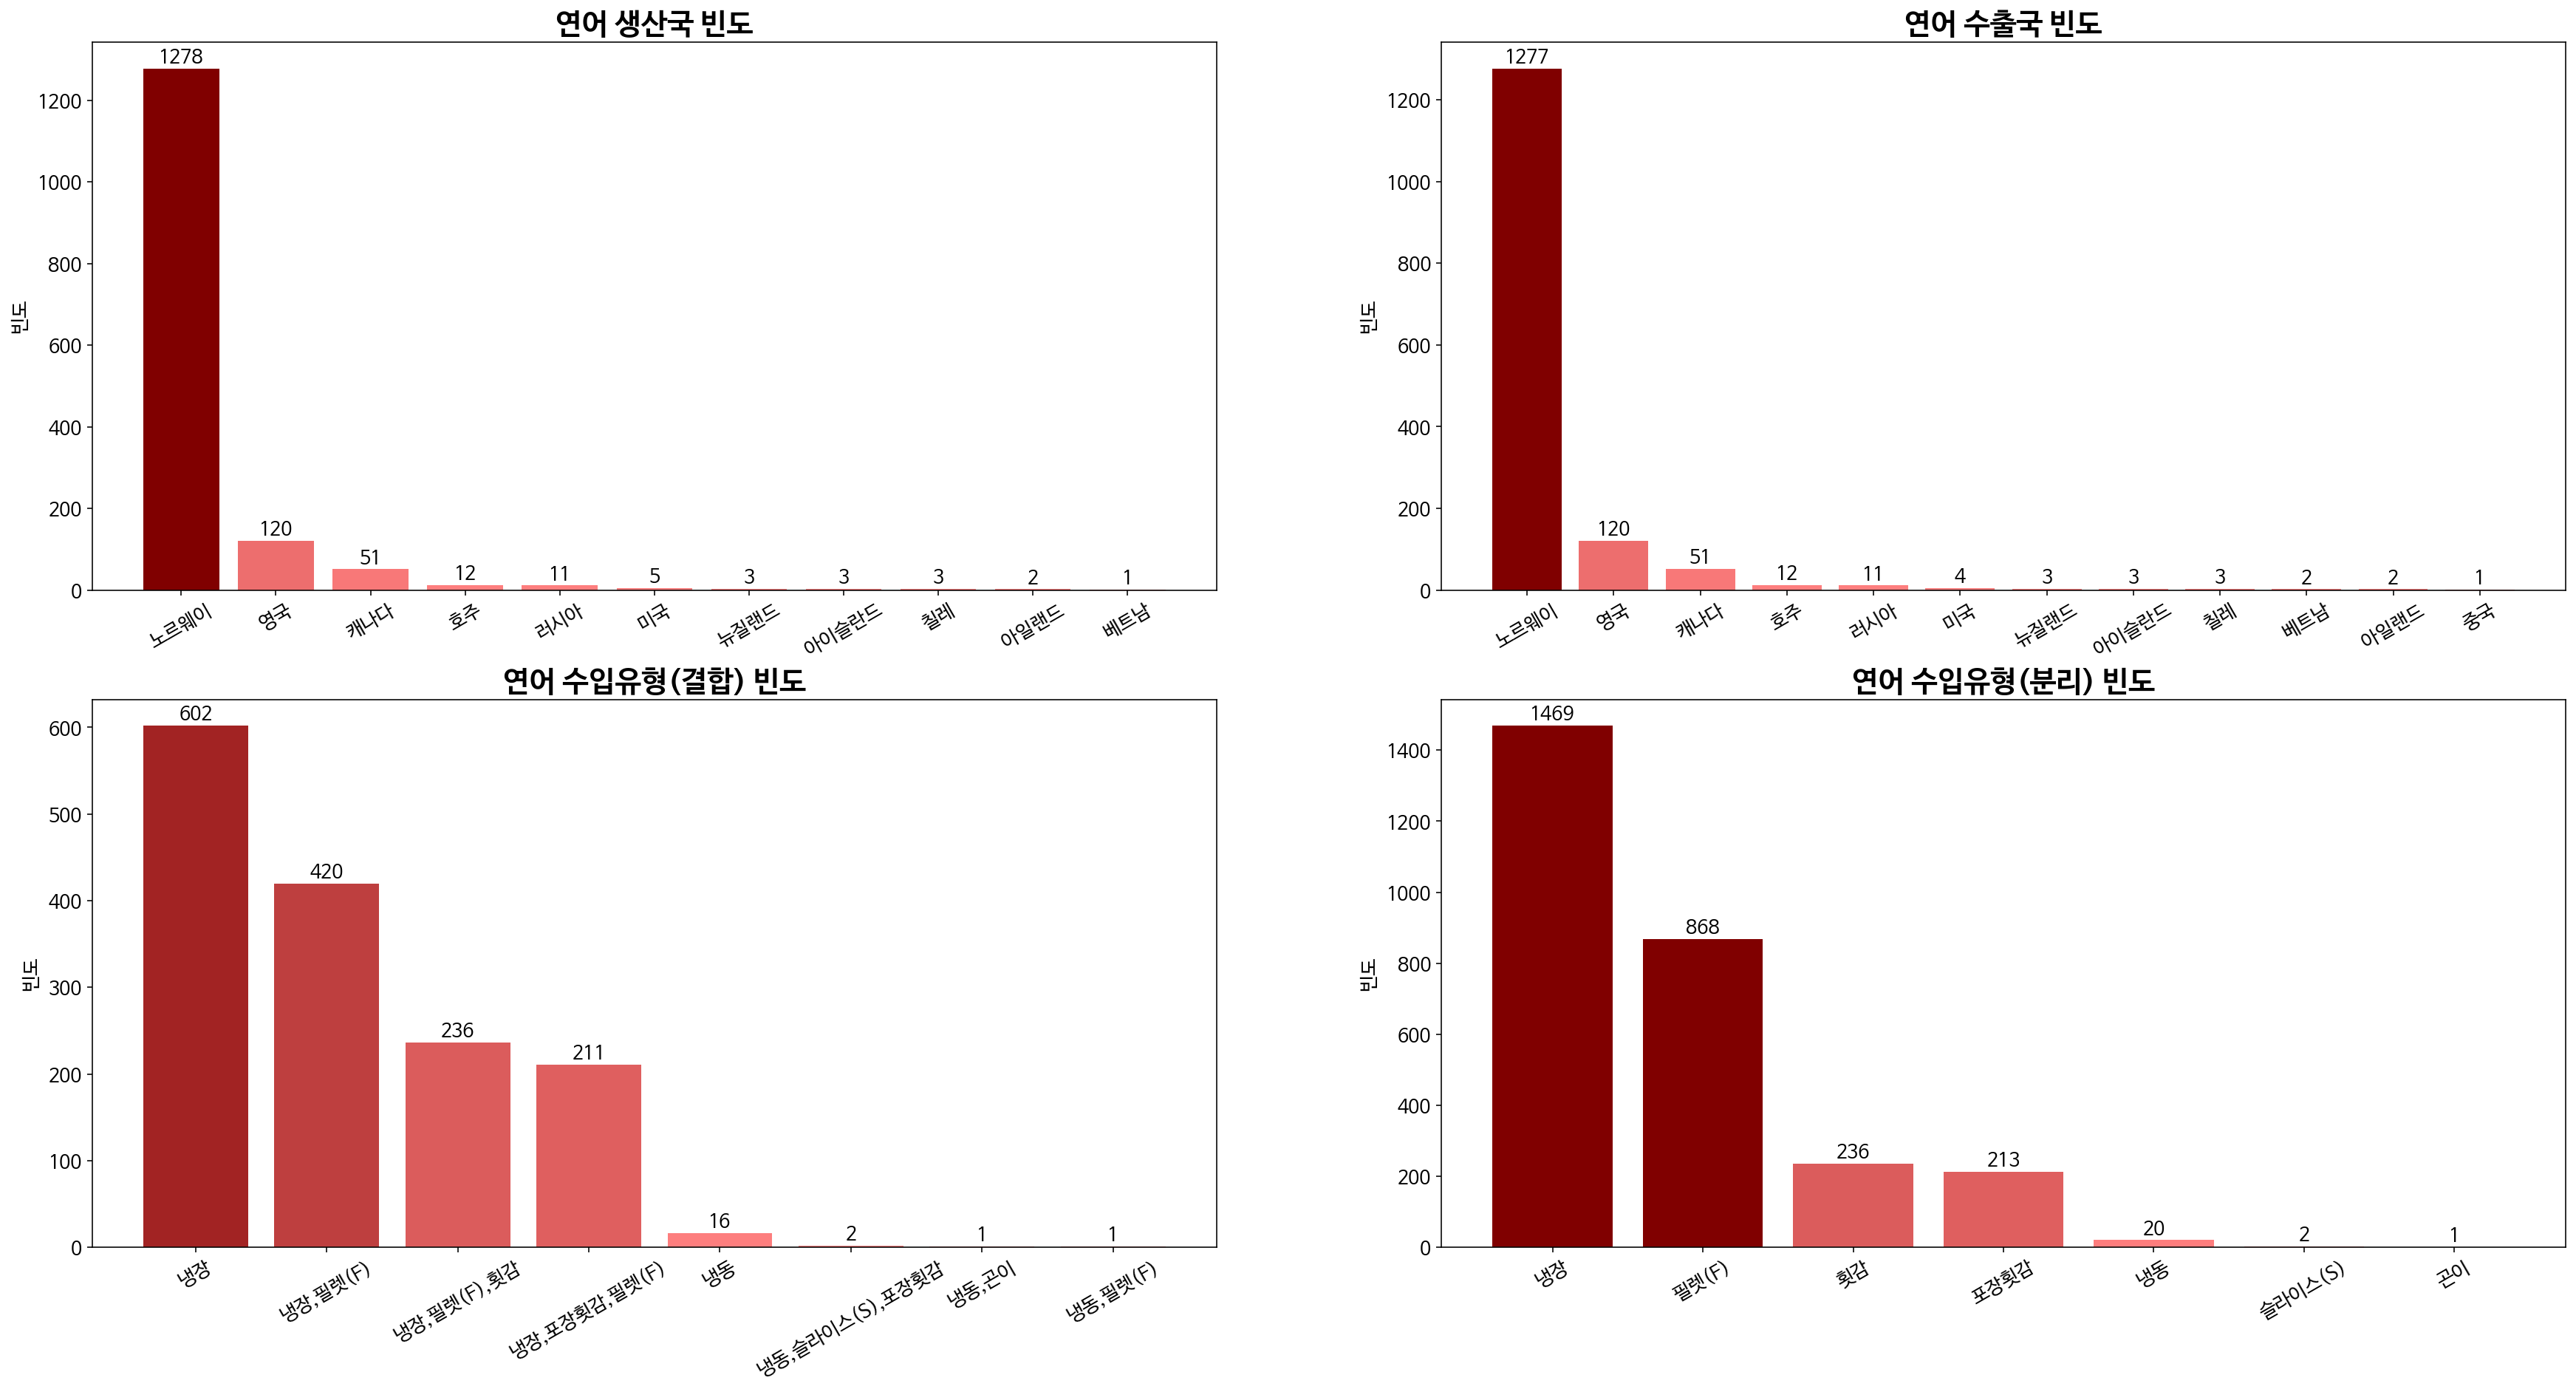

In [64]:
fig, ax = plt.subplots(2, 2 ,figsize=(30,15))
title_list = ['연어 생산국 빈도', '연어 수출국 빈도', '연어 수입유형(결합) 빈도', '연어 수입유형(분리) 빈도']
salmon_data_list = [salmon_df_prod, salmon_df_import, salmon_df_type1, salmon_df_type2]
n = 0
for i in range(len(ax)):
  for j in range(len(ax[i])):
    ax[i][j].tick_params(axis='x', labelrotation=30, labelsize=13)
    ax[i][j].tick_params(axis='y', labelsize=13)
    ax[i][j].set_title(title_list[n], fontweight='bold', size=20)
    ax[i][j].set_ylabel('빈도', fontsize=13)
    bars = ax[i][j].bar(salmon_data_list[n].index, salmon_data_list[n].COUNT, color=color_map(data_normalizer(np.array(salmon_data_list[n].COUNT))))
    get_bar_label(bars, i, j, fontsize=13)
    n += 1

fig.savefig("/content/drive/MyDrive/Colab Notebooks/bigcontest/연어_생산국수출국수입유형빈도.png", dpi=300)

In [27]:
shrimp_df_prod = shrimp_df[["REG_DATE", "CTRY_1"]].groupby("CTRY_1").count()
shrimp_df_prod.columns = ["COUNT"]
shrimp_df_prod = shrimp_df_prod.sort_values(by=["COUNT"], ascending=False)

shrimp_df_import = shrimp_df[["REG_DATE", "CTRY_2"]].groupby("CTRY_2").count()
shrimp_df_import.columns = ["COUNT"]
shrimp_df_import = shrimp_df_import.sort_values(by=["COUNT"], ascending=False)

shrimp_df_type1 = shrimp_df[["REG_DATE", "P_IMPORT_TYPE"]].groupby("P_IMPORT_TYPE").count()
shrimp_df_type1.columns = ["COUNT"]
shrimp_df_type1 = shrimp_df_type1.sort_values(by=["COUNT"], ascending=False)

shrimp_df_type2 = pd.DataFrame()
shrimp_df_type2[["1", "2", "3", "4"]] = shrimp_df['P_IMPORT_TYPE'].str.split(',', expand=True)
shrimp_df_type2 = pd.concat([shrimp_df_type2["1"], shrimp_df_type2["2"], shrimp_df_type2["3"], shrimp_df_type2["4"]], axis=0)
shrimp_df_type2 = pd.DataFrame(shrimp_df_type2.dropna(), columns=["TYPE"])
shrimp_df_type2["COUNT"] = 0
shrimp_df_type2 = shrimp_df_type2.groupby("TYPE").count().sort_values(by=["COUNT"], ascending=False)

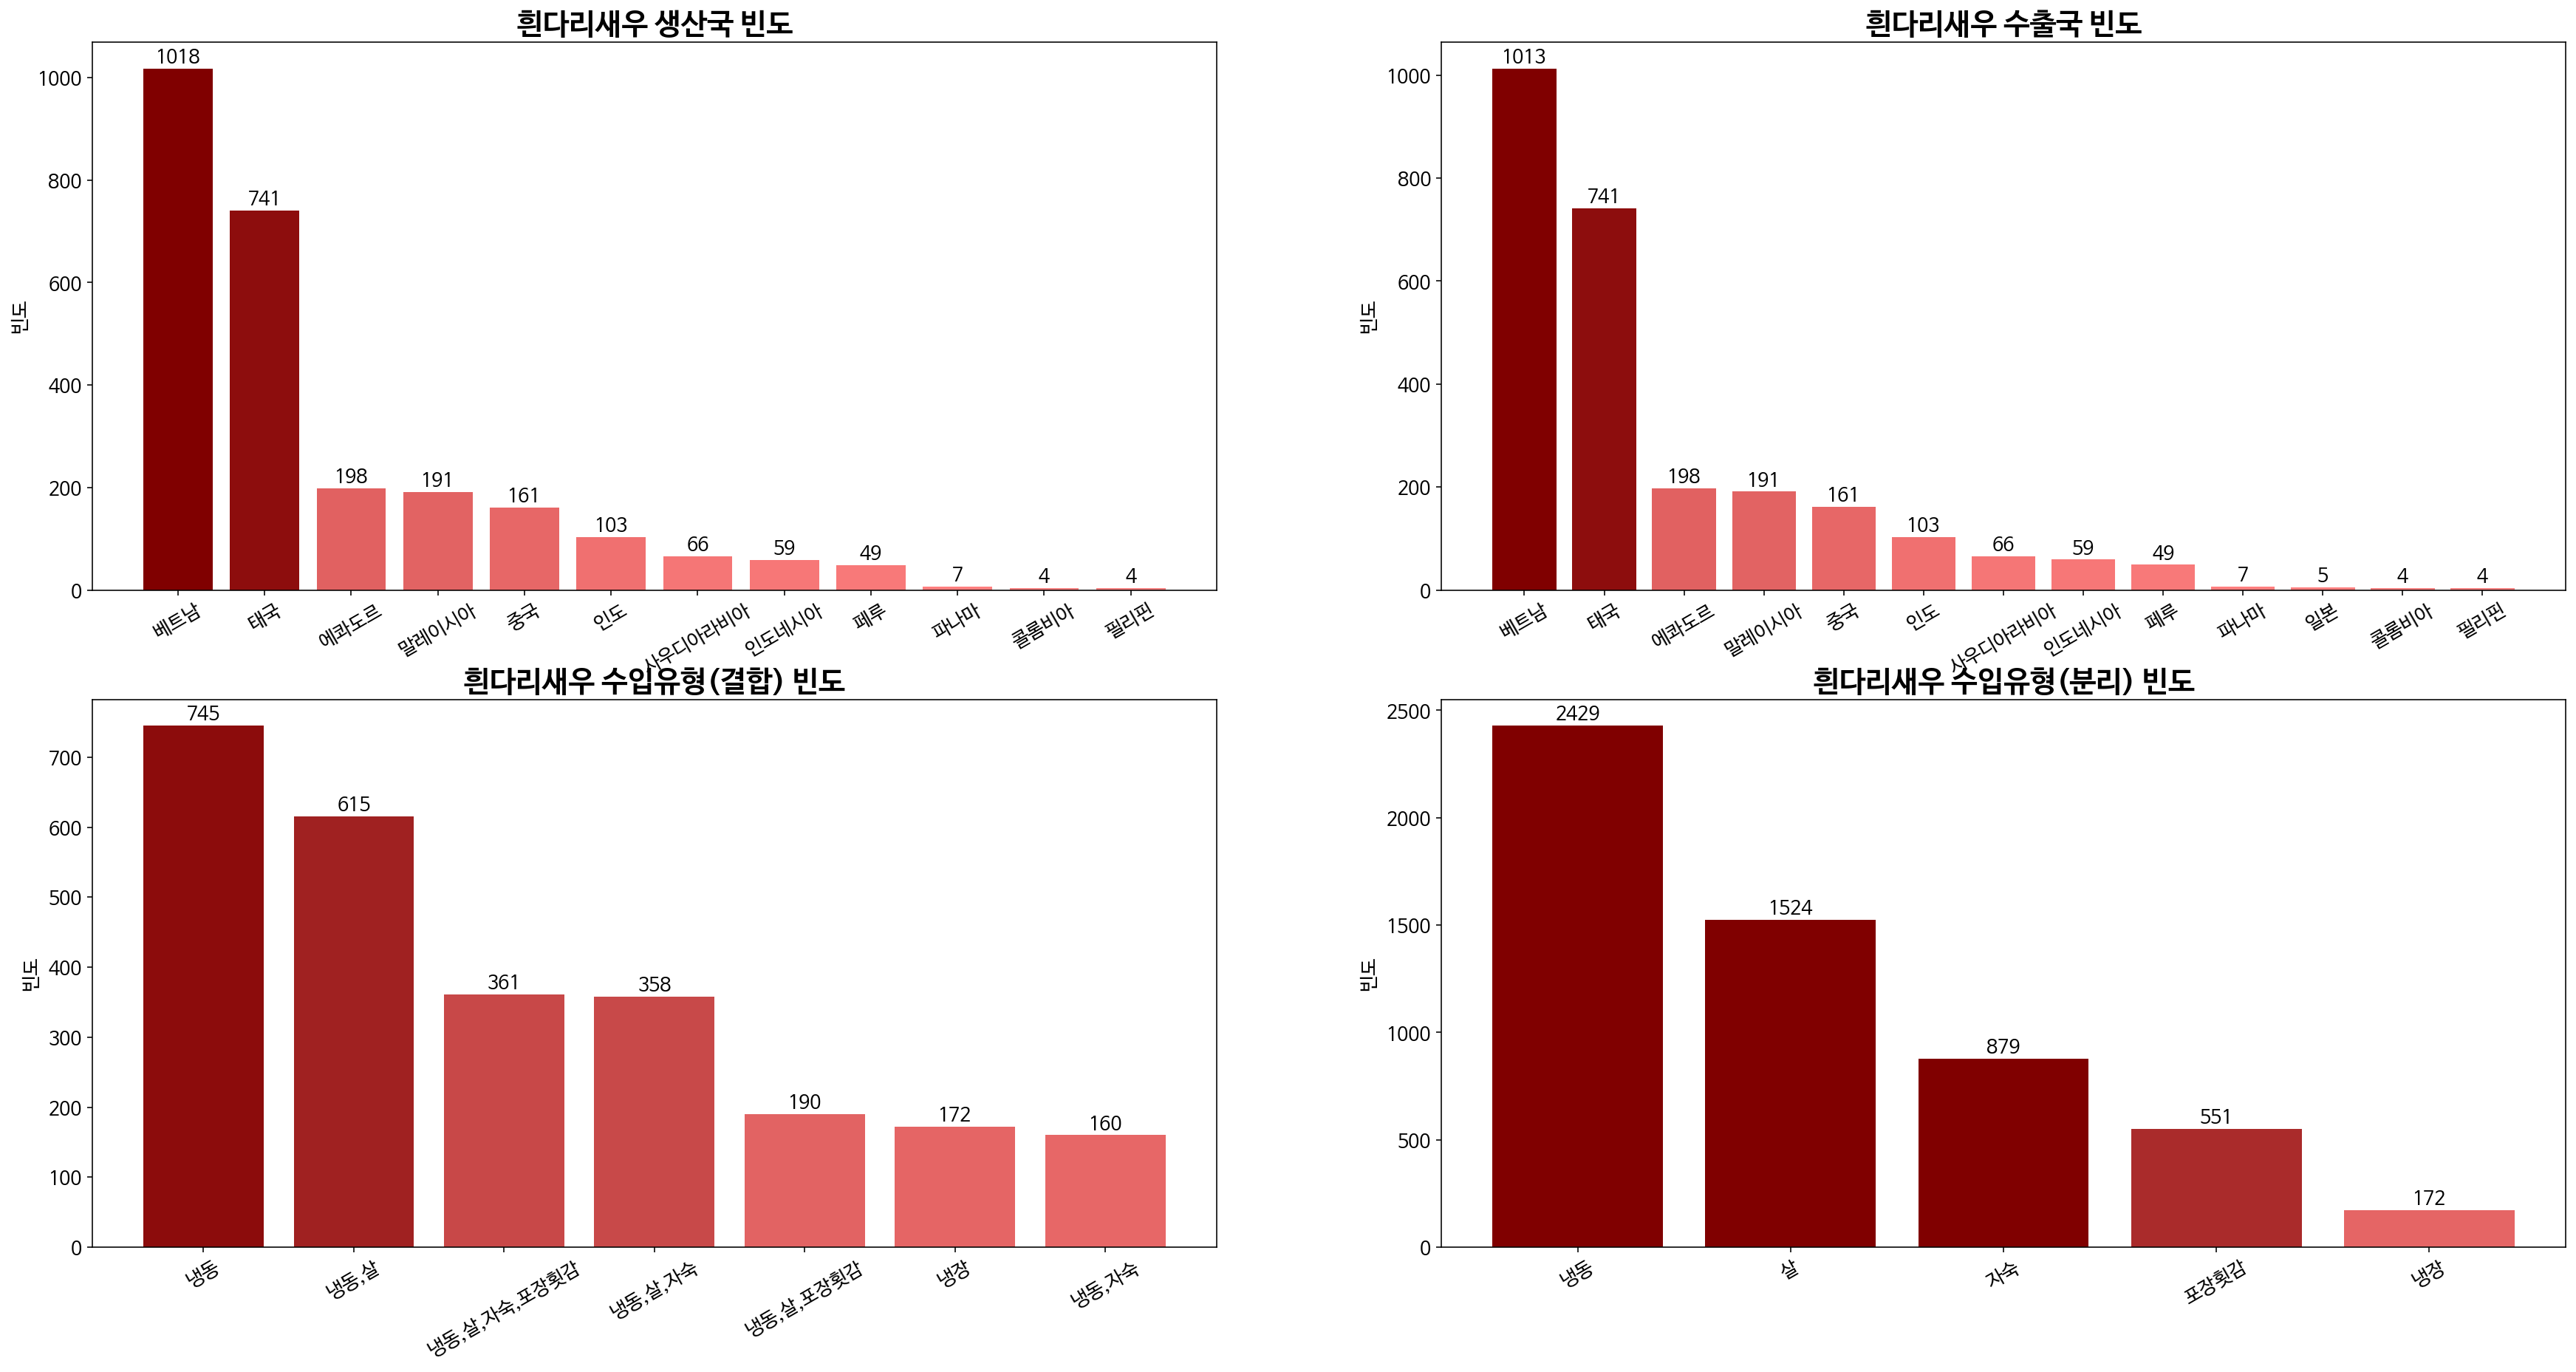

In [65]:
fig, ax = plt.subplots(2, 2 ,figsize=(30,15))
title_list = ['흰다리새우 생산국 빈도', '흰다리새우 수출국 빈도', '흰다리새우 수입유형(결합) 빈도', '흰다리새우 수입유형(분리) 빈도']
shrimp_data_list = [shrimp_df_prod, shrimp_df_import, shrimp_df_type1, shrimp_df_type2]
n = 0
for i in range(len(ax)):
  for j in range(len(ax[i])):
    ax[i][j].tick_params(axis='x', labelrotation=30, labelsize=13)
    ax[i][j].tick_params(axis='y', labelsize=13)
    ax[i][j].set_title(title_list[n], fontweight='bold', size=20)
    ax[i][j].set_ylabel('빈도', fontsize=13)
    bars = ax[i][j].bar(shrimp_data_list[n].index, shrimp_data_list[n].COUNT, color=color_map(data_normalizer(np.array(shrimp_data_list[n].COUNT))))
    get_bar_label(bars, i, j, fontsize=13)
    n += 1

fig.savefig("/content/drive/MyDrive/Colab Notebooks/bigcontest/흰다리새우_생산국수출국수입유형빈도.png", dpi=300)